In [2]:
# step 1: import necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.inspection import permutation_importance


In [3]:
# Step 2: load the dataset
data=pd.read_csv("Downloads/StudentsPerformance.csv")
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
# Encoding Categorical Features
label_encoder = LabelEncoder()
categorical_columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course']
for column in categorical_columns :
    data[column]=label_encoder.fit_transform(data[column])
    

In [5]:
x=data.drop('math score',axis=1)
y=data['math score']

In [6]:
# step 3 : split the data into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [7]:
# step 4: build ans evaluate model

# decision tree Regressor
dt_reg=DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train,y_train)
y_pred_dt=dt_reg.predict(x_test)
dt_mse=mean_squared_error(y_test,y_pred_dt)
dt_r2=r2_score(y_test,y_pred_dt)

# Linear Regression
lr_reg=LinearRegression()
lr_reg.fit(x_train,y_train)
y_pred_lr=lr_reg.predict(x_test)
lr_mse=mean_squared_error(y_test,y_pred_lr)
lr_r2=r2_score(y_test,y_pred_lr)

# Random forest Regressor
rf_reg=RandomForestRegressor(random_state=42)
rf_reg.fit(x_train,y_train)
y_pred_rf=rf_reg.predict(x_test)
rf_mse=mean_squared_error(y_test,y_pred_rf)
rf_r2=r2_score(y_test,y_pred_rf)


In [8]:
# print Evaluation metrics
print(f"Decision Tree MSE : {dt_mse}, R2 : {dt_r2}")
print(f"Linear Regression  MSE : {lr_mse}, R2 : {lr_r2}")
print(f"Random Forest MSE : {rf_mse}, R2 : {rf_r2}")

Decision Tree MSE : 60.86, R2 : 0.7498956186117769
Linear Regression  MSE : 28.27528450632733, R2 : 0.8838026201112223
Random Forest MSE : 36.79422162429139, R2 : 0.8487940184356789


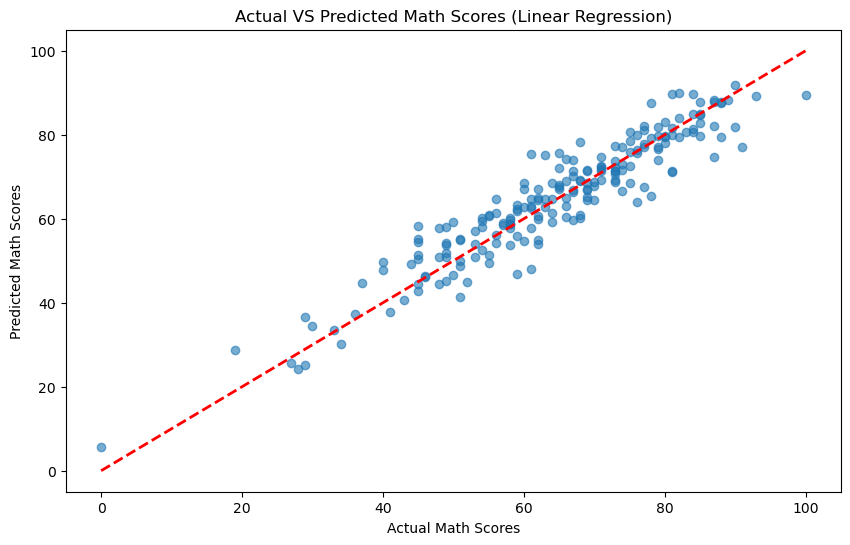

In [9]:
# visualize the predicted vs Actual values for the linear regression model
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_lr,alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual VS Predicted Math Scores (Linear Regression)")
plt.show()

In [10]:
# Step 5 : feature Selection using permutation importance
dt_importance=permutation_importance(dt_reg,x_test,y_test,n_repeats=10,random_state=42)
rf_importance=permutation_importance(rf_reg,x_test,y_test,n_repeats=10,random_state=42)
lr_importance_df=pd.DataFrame({'feature':x.columns,'importance':np.abs(lr_reg.coef_)})

In [11]:
# Create a Dataframe for feature importance 
dt_importance_df=pd.DataFrame({'feature':x.columns,'importance':dt_importance.importances_mean})
rf_importance_df=pd.DataFrame({'feature':x.columns,'importance':rf_importance.importances_mean})

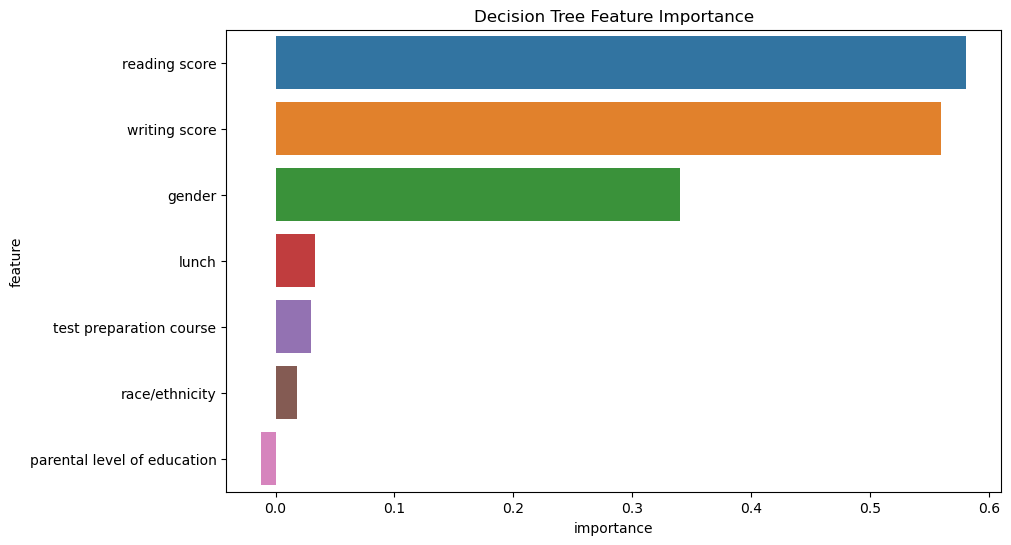

In [12]:
# Step 6 : Visualizations

# Feature importance visualization for Decision Tree
plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='feature',data=dt_importance_df.sort_values(by='importance',ascending=False))
plt.title('Decision Tree Feature Importance')
plt.show()

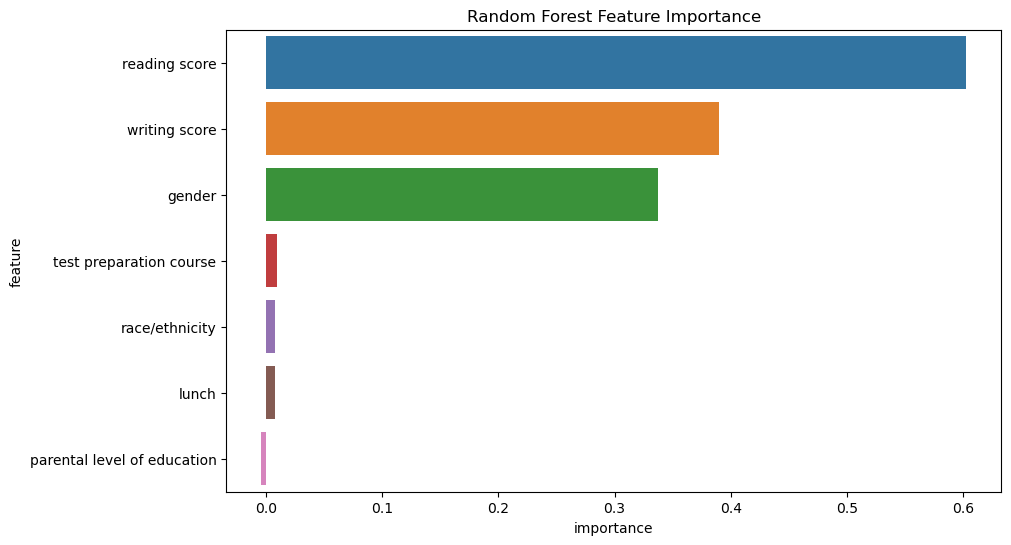

In [13]:
# Feature importance visualization for Random Forest
plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='feature',data=rf_importance_df.sort_values(by='importance',ascending=False))
plt.title("Random Forest Feature Importance")
plt.show()

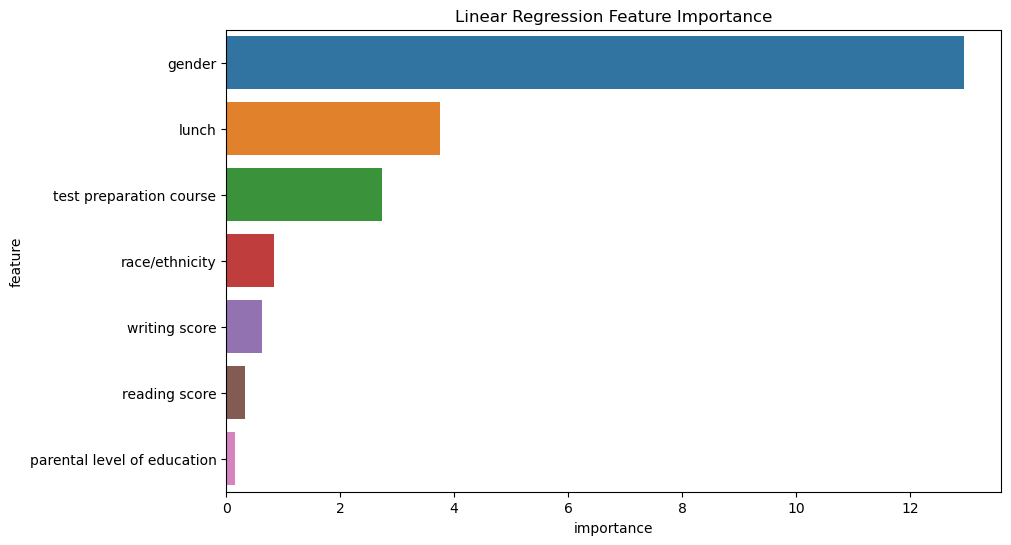

In [14]:
# Linear Regression Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='feature',data=lr_importance_df.sort_values(by='importance',ascending=False))
plt.title("Linear Regression Feature Importance")
plt.show()

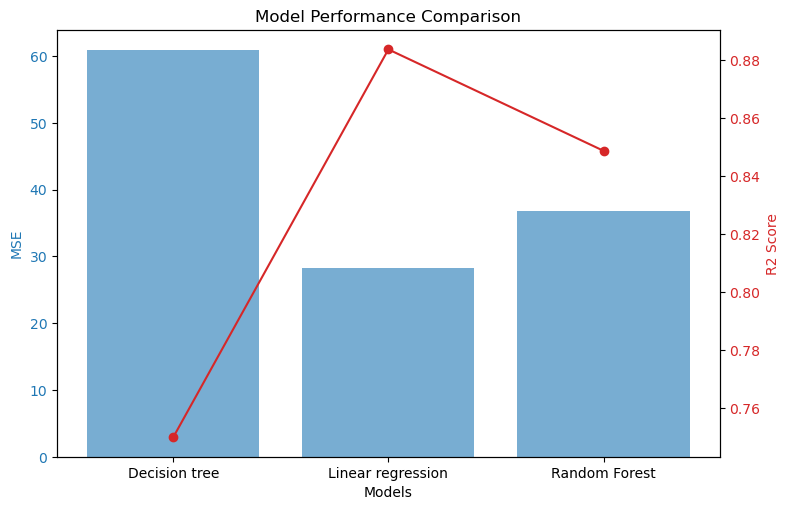

In [16]:
# Comparative graph of model performance
models=['Decision tree','Linear regression','Random Forest']
mse_scores=[dt_mse,lr_mse,rf_mse]
r2_scores=[dt_r2,lr_r2,rf_r2]
fig,ax1=plt.subplots(figsize=(8,5))

color='tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE',color=color)
ax1.bar(models,mse_scores,color=color,alpha=0.6)
ax1.tick_params(axis='y',labelcolor=color)

ax2=ax1.twinx()
color='tab:red'
ax2.set_ylabel('R2 Score',color=color)
ax2.plot(models,r2_scores,color=color,marker='o')
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()
plt.title("Model Performance Comparison")
plt.show()